In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from statistics import median, mean

In [44]:
book_thief = pd.read_csv("the_book_thief.csv", sep="|")
picture_of_dorian_grey = pd.read_csv("the_picture_of_dorian_grey.csv", sep="|")
song_of_achilles = pd.read_csv("the_song_of_achilles.csv", sep = "|")
art_of_war = pd.read_csv("the_art_of_war.csv", sep ="|")
batman = pd.read_csv("batman.csv", sep = "|")

In [51]:
#Bigramme / Trigramme
df = pd.DataFrame(book_thief['renderedContent'])
df.columns = ['reviews']

,reviews
0,cr: the book thief 😊
1,"@literarybase Hard one, but The book thief."
2,@chuu_shoobby @_Boraboravbora @rinxto @ddaengf...
3,@PADFOOTSBALLS the book thief!! single handedl...
4,Christianity\n16. Influence by Philip and Hank...
...,...
995,@kevinklehr I wrote about The Book Thief in my...
996,"At this weekend, I plan to watch Classic War t..."
997,@ColorsTV #NimritKaurAhluwalia #BBQueenNimrit ...
998,@LisforLia I got multiple 5 star reviews for a...


In [55]:
df['polarity'] = df['reviews'].apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df['reviews'].apply(lambda x: TextBlob(x).subjectivity)
df

,reviews,polarity,subjective
0,cr: the book thief 😊,0.000000,0.000000
1,"@literarybase Hard one, but The book thief.",-0.291667,0.541667
2,@chuu_shoobby @_Boraboravbora @rinxto @ddaengf...,0.400000,0.500000
3,@PADFOOTSBALLS the book thief!! single handedl...,0.464286,0.257143
4,Christianity\n16. Influence by Philip and Hank...,0.250000,0.300000
...,...,...,...
995,@kevinklehr I wrote about The Book Thief in my...,0.200000,0.350000
996,"At this weekend, I plan to watch Classic War t...",0.166667,0.166667
997,@ColorsTV #NimritKaurAhluwalia #BBQueenNimrit ...,0.000000,1.000000
998,@LisforLia I got multiple 5 star reviews for a...,0.000000,0.000000


In [59]:
import nltk
nltk.download('stopwords')
stoplist = stopwords.words('english') + ['though']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [109]:
from sklearn.feature_extraction.text import CountVectorizer
bi_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
tri_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
# matrix of ngrams
bigrams = bi_vec.fit_transform(df['reviews'])
trigrams = tri_vec.fit_transform(df['reviews'])
# count frequency of ngrams
count_values_2 = bigrams.toarray().sum(axis=0)
count_values_3 = trigrams.toarray().sum(axis=0)
# list of ngrams
vocab_bi = bi_vec.vocabulary_
vocab_tri = tri_vec.vocabulary_
df_bigram = pd.DataFrame(sorted([(count_values_2[i],k) for k,i in vocab_bi.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
df_trigram = pd.DataFrame(sorted([(count_values_3[i],k) for k,i in vocab_tri.items()], reverse=True)
                         ).rename(columns={0: 'frequency', 1:'trigram'})

In [113]:
df_bigram, df_trigram

(      frequency         bigram
 0          1006     book thief
 1           378   weekend plan
 2           145      read book
 3           126       thief gt
 4           126     plan watch
 ...         ...            ...
 7276          1  007 adventure
 7277          1       000 word
 7278          1      000 human
 7279          1   000 american
 7280          1        000 000
 
 [7281 rows x 2 columns],
       frequency                trigram
 0           126     weekend plan watch
 1           126      weekend plan also
 2           126          lt book thief
 3           126    called weekend plan
 4           126          book thief gt
 ...         ...                    ...
 8200          1         000 human dead
 8201          1  000 american soldiers
 8202          1          000 000 human
 8203          1            00 pm email
 8204          1          00 pm discuss
 
 [8205 rows x 2 columns])

In [115]:
df_bigram = df_bigram[~df_bigram['frequency'].isin([1])]
df_bigram

,frequency,bigram
0,1006,book thief
1,378,weekend plan
2,145,read book
3,126,thief gt
4,126,plan watch
...,...,...
1091,2,11 https
1092,2,10 awards
1093,2,0375831002 https
1094,2,007 horror


In [117]:
df_trigram = df_trigram[~df_trigram['frequency'].isin([1])]
df_trigram

,frequency,trigram
0,126,weekend plan watch
1,126,weekend plan also
2,126,lt book thief
3,126,called weekend plan
4,126,book thief gt
...,...,...
1010,2,15 book thief
1011,2,1101934182 https co
1012,2,11 https co
1013,2,10 awards whatsonstage


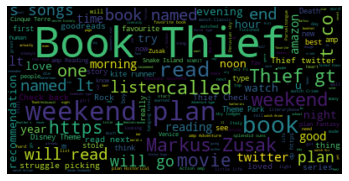

In [150]:
#Nuage de mots
texts = book_thief['renderedContent']
all_text = ' '.join(texts)
wordcloud = WordCloud().generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [151]:
# Analyse de sentiment 
from afinn import Afinn

afinn=Afinn()
afinn_scores = [afinn.score(text) for text in texts]
data = pd.DataFrame(texts)
data['afinn'] = afinn_scores
data = data[['afinn', 'renderedContent']].sort_values(by="afinn")
data = data[~data['afinn'].isin([0])]
mean(data.afinn)

1.00375234521576

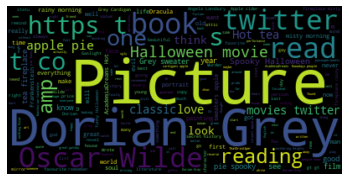

In [148]:
# Nuage de mot
texts = picture_of_dorian_grey['renderedContent']
all_text = ' '.join(texts)
wordcloud = WordCloud().generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [149]:
# Analyse de sentiment 
from afinn import Afinn

afinn=Afinn()
afinn_scores = [afinn.score(text) for text in texts]
data = pd.DataFrame(texts)
data['afinn'] = afinn_scores
data = data[['afinn', 'renderedContent']].sort_values(by="afinn")
data = data[~data['afinn'].isin([0])]
mean(data.afinn)

-0.20824524312896406

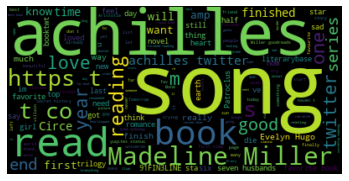

In [152]:
# Nuage de mot
texts = song_of_achilles['renderedContent']
all_text = ' '.join(texts)
wordcloud = WordCloud().generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [153]:
# Analyse de sentiment 
from afinn import Afinn

afinn=Afinn()
afinn_scores = [afinn.score(text) for text in texts]
data = pd.DataFrame(texts)
data['afinn'] = afinn_scores
data = data[['afinn', 'renderedContent']].sort_values(by="afinn")
data = data[~data['afinn'].isin([0])]
mean(data.afinn)

1.5297202797202798

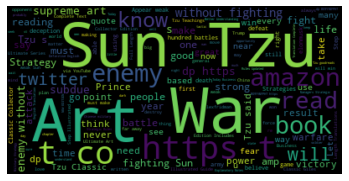

In [154]:
# Nuage de mot
texts = art_of_war['renderedContent']
all_text = ' '.join(texts)
wordcloud = WordCloud().generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [155]:
# Analyse de sentiment 
from afinn import Afinn

afinn=Afinn()
afinn_scores = [afinn.score(text) for text in texts]
data = pd.DataFrame(texts)
data['afinn'] = afinn_scores
data = data[['afinn', 'renderedContent']].sort_values(by="afinn")
data = data[~data['afinn'].isin([0])]
mean(data.afinn)

-2.0401785714285716

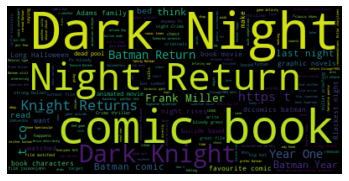

In [156]:
# Nuage de mot
texts = batman['renderedContent']
all_text = ' '.join(texts)
wordcloud = WordCloud().generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [157]:
# Analyse de sentiment 
from afinn import Afinn

afinn=Afinn()
afinn_scores = [afinn.score(text) for text in texts]
data = pd.DataFrame(texts)
data['afinn'] = afinn_scores
data = data[['afinn', 'renderedContent']].sort_values(by="afinn")
data = data[~data['afinn'].isin([0])]
mean(data.afinn)

3.590439276485788